# Inaugral project

See Read.me for additional information.

**Table of contents**   
- Question 1
- Question 2 
- Question 3
- Question 4
- Question 5

In [1]:
%load_ext autoreload
%autoreload 2

# Question 1

For the following exercise, we will assume that the choice set for the model is discrete in half hours. Specificially, this means that

$$L_M, L_F, H_M, H_F \in [ \frac{0\cdot24}{48}, \frac{1\cdot24}{48}, ..., \frac{48\cdot24}{48}] $$

Running the code below, yields a figure illustrating how $\frac{H_F}{H_M}$ changes when varying $\alpha \in {0.25, 0.50, 0.75}$ and $\sigma = {0.5, 1.0, 1.5}$. 

Intuitively, this is an investigation of how the ratio of hours worked at home-production for female members relative to male mebers of the household is affected by the productivity in home production for female mebers relative to male members of the household, $\alpha$, and $\sigma$ is the elasticity of substition.

A description of the results is given below the plots.

This is the procedure of the code below:

- We import the packages we need to later illustrate the results in a plot, and also import our HouseholdSpecializationModelClass from a module.
- We create an instance of the model class, which we call model
- Create a list of values for alpha we want to solve the model for
- The first loop is for solving the model for different values of $\alpha$, while holding $\sigma$ fixed at 1.0. The value is then plotted in a scatterplot
- Create a list of values for $\sigma$ we want to solve the model for
- The second loop is for solving the model for different values of $\sigma$, while holding $\alpha$ fixed at 0.5.
- At the end we call the two plots that we just generated by looping.

/Users/olivernwmac/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KUonedriveOW/7. semester/IntroProg/projects-2023-de-slemme-programmeringsrotter/Inaugralproject/Inaugralproject.py:68: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-7)**(1-par.rho)/(1-par.rho)
/Users/olivernwmac/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KUonedriveOW/7. semester/IntroProg/projects-2023-de-slemme-programmeringsrotter/Inaugralproject/Inaugralproject.py:62: RuntimeWarning: invalid value encountered in reciprocal
  inner = (1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma)
/Users/olivernwmac/Library/CloudStorage/OneDrive-UniversityofCopenhagen/KUonedriveOW/7. semester/IntroProg/projects-2023-de-slemme-programmeringsrotter/Inaugralproject/Inaugralproject.py:63: RuntimeWarning: invalid value encountered in reciprocal
  H=np.fmax(inner, 1e-07) **(par.sigma/(par.sigma-1))


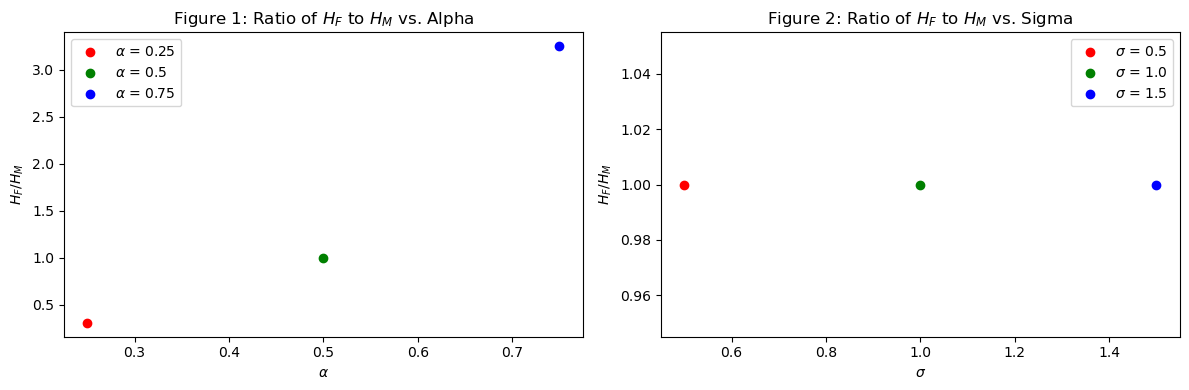

In [2]:
import matplotlib.pyplot as plt
from Inaugralproject import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# plot H_F/H_M vs alpha
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axs[0]
alphas = [0.25, 0.5, 0.75] #Create a list of values for alpha we want to solve the model for
colors = ['red', 'green', 'blue']

#First loop
for i, alpha in enumerate(alphas):
    model.par.alpha = alpha
    model.par.sigma = 1.0
    opt = model.solve_discrete()
    ax.scatter(alpha, opt.HF/opt.HM, label=r'$\alpha$ = {}'.format(alpha), color=colors[i])

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Figure 1: Ratio of $H_F$ to $H_M$ vs. Alpha')
ax.legend()

# plot H_F/H_M vs sigma
ax = axs[1]
sigmas = [0.5, 1.0, 1.5]
colors = ['red', 'green', 'blue']


#Second loop
for i, sigma in enumerate(sigmas):
    model.par.sigma = sigma
    model.par.alpha = 0.5
    opt = model.solve_discrete()
    ax.scatter(sigma, opt.HF/opt.HM, label=r'$\sigma$ = {}'.format(sigma), color=colors[i])

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Figure 2: Ratio of $H_F$ to $H_M$ vs. Sigma')
ax.legend()

# display the plots
plt.tight_layout()
plt.show()

**Figure 1** illustrates that with an increase in the relative productivity of female members in comparison to male members, denoted by an upward shift in $\alpha$, the ratio $\frac{H_F}{H_M}$ also increases. In other words, the proportion of hours spent working at home by female members relative to male members rises as their relative productivity increases.

**Figure 2** demonstrates that the ratio of female to male hours worked at home, represented by $\frac{H_F}{H_M}$, remains unchanged, all other things being equal, regardless of the elasticity of substitution ($\sigma$). The reason for this is that $\sigma$ controls the response in $\frac{H_F}{H_M}$ to changes in $\alpha$. However, since $\alpha$ remains constant in this scenario, no alterations in household behavior are observed in response to changes in $\sigma$.




# Question 2

In the following exercise, we continue with our assumption of a discrete choice set in half hours, and now move to plotting $log(\frac{H_F}{H_M})$ against $log(\frac{w_F}{w_M})$ for different values of $w_F$.

Overview of what the code below does:
- Import libraries and HouseholdsSpecializationModelClass from the module
- Create an instance of the HouseholdSpecializationModelClass and set default parameters for alpha and sigma
- Initialize empty lists for storing H_F/H_M and log(w_F/w_M)
- Loop through the w_F values provided in model.par.wF_vec and solve the model for each value, appending the results to the lists.
- Create scatter plot
- Display the plot with appropriate labels and legend-

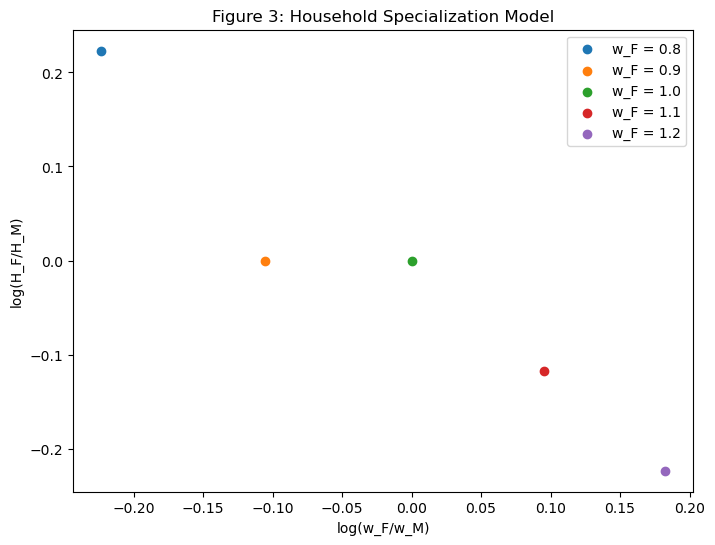

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Inaugralproject import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# solve the model for the default parameters
model.par.alpha = 0.5
model.par.sigma = 1.0
opt = model.solve_discrete()

# specify w_F values directly in the main script
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# create lists to store data for each value of w_F
HF_HM_list = []
log_wf_wm_list = []

# solve the model for each value of w_F
for w_F in wF_values:
    model.par.wF = w_F
    opt = model.solve_discrete()
    HF_HM_list.append(opt.HF/opt.HM)
    log_wf_wm_list.append(np.log(w_F/model.par.wM))

# create the plot
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(HF_HM_list)):
    ax.scatter(log_wf_wm_list[i], np.log(HF_HM_list[i]), label=f"w_F = {wF_values[i]:.1f}")

ax.set_xlabel("log(w_F/w_M)")
ax.set_ylabel("log(H_F/H_M)")
ax.set_title("Ratio of H_F to H_M vs. Ratio of W_F to W_M")
ax.legend()

ax.set_title('Figure 3: Household Specialization Model')
plt.show()

**Figure 3** indicates that the ratio $\frac{H_F}{H_M}$ tends to decrease as $\frac{w_F}{w_M}$ increases. As $w_F$ increases, we observe a decrease in $\frac{H_F}{H_M}$, attributable to women shifting towards productive work due to its relative comparative advantages for the couple. However, there appears to be no noticeable difference in the plot for $w_F = 1.0$ and $w_F = 0.9$. This is contrary to our expectations, and we anticipate that this will be addressed when we move to a continuous choice set.

One potential solution for the discrete version could involve enhancing the grid points in our solve_discrete function within the module to facilitate a finer grid and enable a more precise decision. This approach, however, would be more computationally intensive.

# Question 3

We now assume that the choice set is continous. This is equivalent to increase the possible choice set, which in question 1 and 2 were limited to half hours. We are now modelling infinitely many choice possibilites. Based on this, we expect the kink from figure 3 to disappear.

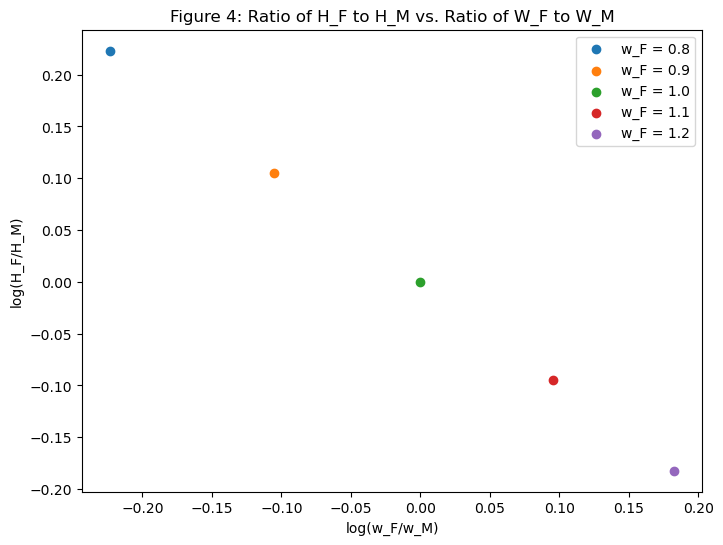

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Inaugralproject import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

#Create the list of the values wF we want to go through
wF_vec = np.linspace(0.8,1.2,5) #This adds the wF_vec

model.solve_wF_vec()     

model.par.wF = w_F
# create the plot
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(wF_vec)):
    ax.scatter(np.log(wF_vec[i]), np.log(model.sol.HF_vec[i] / model.sol.HM_vec[i]), label=f"w_F = {wF_vec[i]:.1f}")

ax.set_xlabel("log(w_F/w_M)")
ax.set_ylabel("log(H_F/H_M)")
ax.set_title("Figure 4: Ratio of H_F to H_M vs. Ratio of W_F to W_M")
ax.legend()

plt.show()

**Figure 4** reveals that the negative relationship between $\frac{wF}{wM}$ and $\frac{H_F}{H_M}$ is now more clear, as the infinit choice set allows for a precise solution, which  reveals a more smooth linear relationship

Imports and set magics:

# Question 4



In this exercise we will initially choose $\alpha$ and $\sigma$ that minimize the sum of squared errors. Next, we will in figure 5 (see below) illustrate how well the model fit the data.


The code is to estimate $\alpha$ and  $\sigma$. The code defines an objective function obje(x) that takes two parameters alpha and sigma, sets them in the model object, solves and runs regression, and returns the squared difference between beta0_target and beta0 and beta1_target and beta1, where the targets are given from the exercise. Then, using scipy.optimize.minimize(), it finds the minimum of obje() with bounds and initial guess provided, and prints the result.

In [5]:
from scipy import optimize

def obje(x):
    model.par.alpha=x[0]
    model.par.sigma=x[1]
    model.solve_wF_vec()
    model.run_regression()
    return (model.par.beta0_target - model.sol.beta0)**2 + (model.par.beta1_target - model.sol.beta1)**2

bounds = [(0.5,0.99),(0.01, 0.3)]
initial_guess = [0.8, 0.1]
#initial guess og bounds er vigtige. Bounds fra en 0.5 til 0.9
res = optimize.minimize(obje, initial_guess, method='Nelder-Mead', bounds=bounds, tol = 0.000000001) #Hvis tolerancen er høj, accepterer den løsninger som kun er tæt på at være rigtige

print(res)

 final_simplex: (array([[0.98201071, 0.10000407],
       [0.98201071, 0.10000407],
       [0.98201071, 0.10000407]]), array([8.70858975e-18, 8.21842312e-17, 3.31026433e-16]))
           fun: 8.70858975442799e-18
       message: 'Optimization terminated successfully.'
          nfev: 137
           nit: 67
        status: 0
       success: True
             x: array([0.98201071, 0.10000407])


**Resulting estimates** $(\hat\alpha, \hat\sigma) = (0.98, 0.19)$

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

model = HouseholdSpecializationModelClass()


alpha_vals = np.linspace(0.5, 0.9, 10)  # define range of alpha values to test
sigma_vals = np.linspace(0.1, 0.3, 10)  # define range of sigma values to test

errors = np.zeros((len(alpha_vals), len(sigma_vals)))  # initialize array to hold errors

for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        model.par.alpha = alpha
        model.par.sigma = sigma
        model.solve_wF_vec(discrete=False)
        model.run_regression()
        errors[i,j] = (model.par.beta0_target - model.sol.beta0)**2 + (model.par.beta1_target - model.sol.beta1)**2

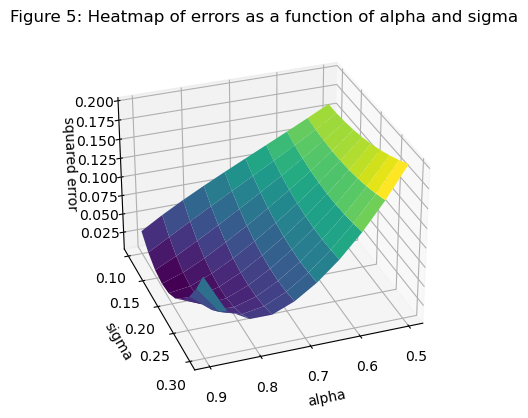

In [7]:
# create 3D plot of squared errors as a function of alpha and sigma
alpha_mesh, sigma_mesh = np.meshgrid(alpha_vals, sigma_vals, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_mesh, sigma_mesh, errors, cmap='viridis')
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('squared error')
ax.set_title("Figure 5: Heatmap of errors as a function of alpha and sigma")

ax.view_init(elev=30, azim=70)  # adjust view angle
plt.show()

**Figure 5** is in accordance with out estimates of $(\hat\alpha, \hat\sigma) = (0.98, 0.19)$, as the figure indicates this is actually the minimum squared error.

In [8]:
print("Minimum squared error:", res.fun)


Minimum squared error: 8.70858975442799e-18


# Question 5

For this exercise, we will assume that $\alpha$=0.5, which is in accordance with empirical evidence.

Our extention is that, now there is a crucial difference between being a man and a woman. The men now experience a disutility of spending hours at home, making their utility-function different than before. This way, we model some **heterogeneity across genders.**


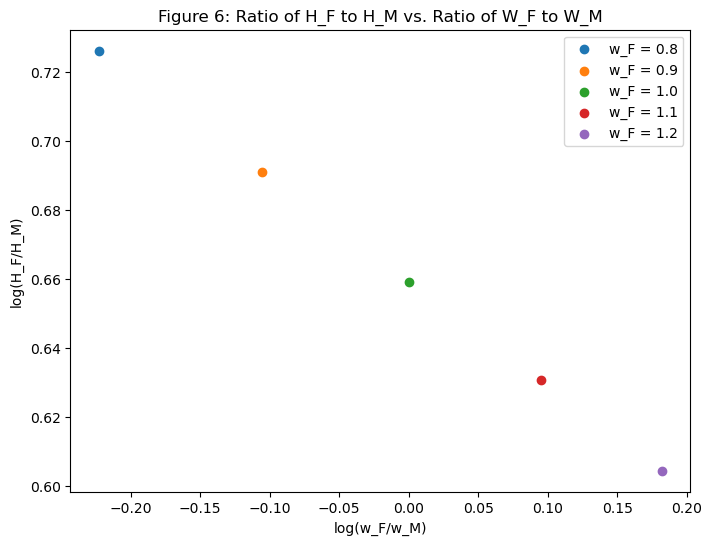

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Inaugralproject import HouseholdSpecializationModelClassExtended

# create an instance of the model class
modelext = HouseholdSpecializationModelClassExtended()

#Create the list of the values wF we want to go through
wF_vec = np.linspace(0.8,1.2,5) #This adds the wF_vec

modelext.solve_wF_vec()     

modelext.par.wF = w_F
# create the plot
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(wF_vec)):
    ax.scatter(np.log(wF_vec[i]), np.log(model.sol.HF_vec[i] / model.sol.HM_vec[i]), label=f"w_F = {wF_vec[i]:.1f}")

ax.set_xlabel("log(w_F/w_M)")
ax.set_ylabel("log(H_F/H_M)")
ax.set_title("Figure 6: Ratio of H_F to H_M vs. Ratio of W_F to W_M")
ax.legend()

plt.show()

**Figure 6** closely resembles **Figure 4**, though there is a notable difference in the values on the secondary axis. In this scenario, where the male gender experiences disutility from working at home, the ratio $\frac{H_F}{H_M}$ is elevated. In other words, at a given level of $\frac{w_F}{w_M}$, women will allocate more time to home-related tasks (and conversely, men will allocate less) relative to the situation prior to the introduction of gender heterogeneity. The key points from this observation are:

- The ratio of female to male home-working hours, $\frac{H_F}{H_M}$, is higher when men experience disutility from home-related work.
- For a specific wage ratio $\frac{w_F}{w_M}$, the shift in home-working hours is gender-specific: women spend more time on home tasks and men less.
- The differences between Figures 4 and 6 illustrate the impact of gender heterogeneity on home-working hours distribution.